# Groupement/clustering avec KMeans

Dans ce notebook on utilise la méthode KMeans pour grouper nos données en utilisant l'altitude et les coordonnées LV-95

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pyproj import Transformer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Lecture du fichier csv
df_berce = pd.read_csv("processed_data\df_berce_clean.csv", index_col=0)

In [50]:
# Initialisation des transformateurs de coordonnées
transformer_to_lv95 = Transformer.from_crs("EPSG:4326", "EPSG:2056", always_xy=True)
transformer_to_wgs84 = Transformer.from_crs("EPSG:2056", "EPSG:4326", always_xy=True)

# Fonction pour convertir latitude/longitude en coordonnées LV95 et les placer dans des carrés de 1 km²
def convert_to_grid(row):
    x, y = transformer_to_lv95.transform(row['decimalLongitude'], row['decimalLatitude'])
    # Arrondir les coordonnées au km pour obtenir les centres des carrés de 1 km²
    row['grid_x'] = round(x, -3)
    row['grid_y'] = round(y, -3)
    return row

# Application de la conversion sur chaque ligne
df_berce = df_berce.apply(convert_to_grid, axis=1)

# Suppression des colonnes transformées
df_berce.drop(columns=['decimalLatitude', 'decimalLongitude', 'date'], inplace=True)

df_berce.head()

,elevation,grid_x,grid_y
0,658.0,2637000.0,1128000.0
1,500.0,2605000.0,1222000.0
2,500.0,2605000.0,1222000.0
14,1448.0,2566000.0,1138000.0
15,1246.5,2579000.0,1133000.0


In [51]:
# Check NaN values
df_berce.isna().sum()

elevation    61
grid_x        0
grid_y        0
dtype: int64

In [52]:
# Suppression des lignes avec des valeurs manquantes
df_berce.dropna(inplace=True)

# Check NaN values
df_berce.isna().sum()

elevation    0
grid_x       0
grid_y       0
dtype: int64

In [53]:
# Normalisation
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_berce[['elevation']])

In [54]:
# K-Means Clustering
kmeans = KMeans(n_clusters=5)  # Choose the number of clusters
clusters = kmeans.fit_predict(data_scaled)

# Ajout des clusters au DataFrame original
df_berce['cluster'] = clusters

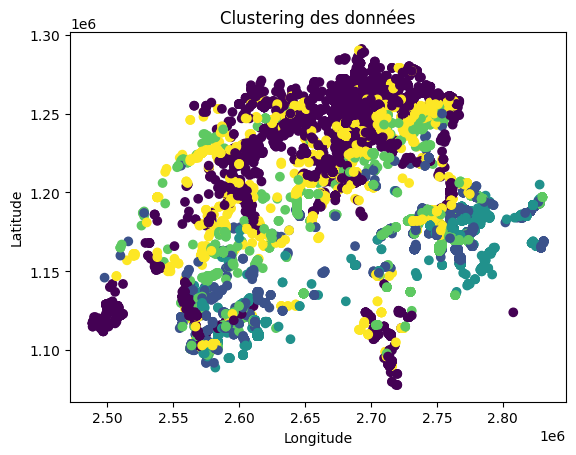

In [55]:
# Visualisation
plt.scatter(df_berce['grid_x'], df_berce['grid_y'], c=df_berce['cluster'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering des données')
plt.show()